In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cross_validation
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, grid_search, datasets
from sklearn.learning_curve import learning_curve




%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = pd.read_csv("iris.data", header = -1)
irism = iris.as_matrix()

In [3]:
#Split test and train matrix
trainint, testint = cross_validation.train_test_split(irism, test_size=0.33, random_state=42)

#Remove labels
xtrain = trainint[:,:4]
ytrain = trainint[:,4]
xtest = testint[:,:4]
ytest = testint[:,4]

#Scale predictors for Xs on test and train
scaler = sklearn.preprocessing.StandardScaler()
scalefit = scaler.fit(xtrain)
scale_xtrain = scaler.transform(xtrain)
scale_xtest = scaler.transform(xtest)

#Create total scaled matrix for easier access
total_scale_x  = np.ma.row_stack((xtrain,xtest))
total_scale_y = np.concatenate((ytrain,ytest))

#Recombine
train = np.column_stack((scale_xtrain,ytrain))
test = np.column_stack((scale_xtest,ytest))


In [4]:
pca = PCA(n_components=4)
fit = pca.fit(scale_xtrain)
scores = pca.transform(scale_xtrain)

#COMBINE INTO DATAFRAME
pca_m = np.column_stack((scores,ytrain))

In [5]:
%pylab qt
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
le = preprocessing.LabelEncoder()
y = le.fit_transform(ytrain)

ax.scatter(scores[:,0], scores[:,1], scores[:,2], c = y)
plt.show()

`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


Populating the interactive namespace from numpy and matplotlib


In [6]:
print np.shape(scale_xtrain)
print np.shape(scale_xtest)

(100, 4)
(50, 4)


In [7]:
lr = sklearn.linear_model.LogisticRegression()
lrfit = lr.fit(scale_xtrain,ytrain)

In [8]:
trainlist = numpy.arange(5, 45, 1)
train_sizes, train_scores, test_scores = learning_curve(lr, total_scale_x, total_scale_y, train_sizes = trainlist)

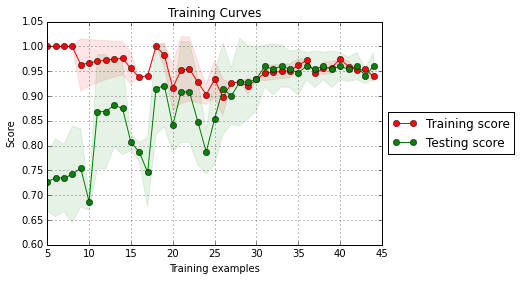

In [9]:
%matplotlib inline

plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Training Curves')
plt.show()

In [10]:
#Create Parameter Grid
parameters = {'fit_intercept':('True', 'False'), 'C': numpy.arange(0.1, 1, 0.001),}

In [11]:
#Use Grid Search to run through multiple parameters
clf = grid_search.GridSearchCV(lr, parameters)

In [12]:
#Run through Grid Search
test = clf.fit(total_scale_x,total_scale_y)

In [13]:
#Pull all grid_scores_ from the Grid Search
grid = test.grid_scores_
means = [x[1] for x in test.grid_scores_]
std =[x[0] for x in test.grid_scores_]

cnumber = []
intercept = []
for i in range(0,len(grid)):
    cnumber.append(std[i]['C'])
    intercept.append(std[i]['fit_intercept'])
#combine extracted dictionary into matrix
final = zip(means,cnumber, intercept)
#Convert to a Dataframe in order to be able to filter
finaldf = pd.DataFrame(final)

In [14]:
#Redefine columns name
finaldf.columns = ['mean', 'C', 'intercept']
#Pull out the trues for graphing
Trues = finaldf[finaldf['intercept'] == "True"]
Cs = Trues["C"]
MeansCs = Trues["mean"]

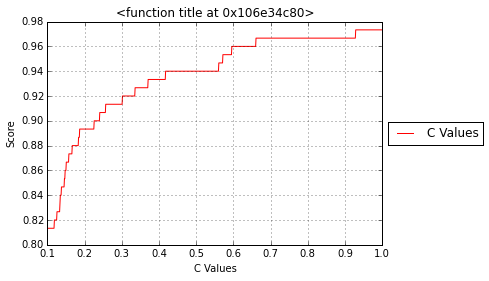

In [15]:
plt.figure()
train_scores = MeansCs
train_sizes = Cs
plt.title(title)
plt.xlabel("C Values")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores, color="r",label="C Values")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()